# 目标检测和边界框

前面小节里我们介绍了诸多用于图像分类的模型。在图像分类任务里，我们假设图像里只有一个主体目标，并关注如何识别该目标的类别。然而，很多时候图像里有多个我们感兴趣的目标，我们不仅想知道它们的类别，还想得到它们在图像中的具体位置。在计算机视觉里，我们将这类任务称为目标检测（或物体检测）。

目标检测在多个领域被广泛使用。例如在无人驾驶里，我们需要通过识别拍摄到的视频图像里的车辆、行人、道路和障碍的位置来规划行进线路。机器人也常通过该任务来检测感兴趣的目标。安防领域则需要检测异常目标，例如歹徒或者炸弹。

在接下来的几节里，我们将介绍目标检测里的多个深度学习模型。在此之前，让我们来了解目标位置这个概念。先导入实验所需的包或模块。

In [1]:
%matplotlib inline
import d2lzh as d2l
from mxnet import image

下面加载本节将使用的示例图像。可以看到图像左边是一只狗，右边是一只猫。它们是这张图像里的两个主要目标。

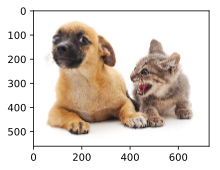

In [2]:
d2l.set_figsize()
img = image.imread('../img/catdog.jpg').asnumpy()
d2l.plt.imshow(img);  # 加分号只显示图

## 边界框

在目标检测里，我们通常使用边界框（bounding box）来描述目标位置。边界框是一个矩形框，可以由矩形左上角的$x$和$y$轴坐标与右下角的$x$和$y$轴坐标确定。我们根据上图坐标信息来定义图中狗和猫的边界框。上图中的坐标原点在图像的左上角，原点往右和往下分别为$x$轴和$y$轴的正方向。

In [3]:
# bbox是bounding box的缩写
dog_bbox, cat_bbox = [60, 45, 378, 516], [400, 112, 655, 493]

我们可以在图中将边界框画出来，以检查其是否准确。画之前，我们定义一个辅助函数`bbox_to_rect`。它将边界框表示成matplotlib的边界框格式。

In [4]:
def bbox_to_rect(bbox, color):  # 本函数已保存在d2lzh包中方便以后使用
    # 将边界框(左上x,左上y,右下x,右下y)格式转换成matplotlib格式：((左上x,左上y),宽,高)
    return d2l.plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

我们将边界框加载在图像上，可以看到目标的主要轮廓基本在框内。

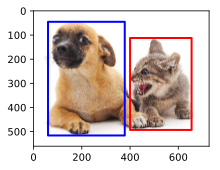

In [5]:
fig = d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'));

## 小结

* 在目标检测里我们不仅需要找出图像里面所有感兴趣的目标，而且要知道它们的位置。位置一般由矩形边界框来表示。

## 练习

* 找一些图像，尝试标注其中目标的边界框。比较标注边界框与标注类别所花时间的差异。


## 扫码直达[讨论区](https://discuss.gluon.ai/t/topic/7023)

![](../img/qr_bounding-box.svg)